In [1]:
import pandas as pd
import numpy as np
import os 
import pickle
import json
import matplotlib.pyplot as plt
from utils import utils_models, utils_gn, utils_sevsn
import importlib
importlib.reload(utils_models)
importlib.reload(utils_gn)

<module 'utils.utils_gn' from '/home/s2228293/Documents/MACMIGS-Year1/Semester2/Extended_Project/feature-engineering/utils/utils_gn.py'>

In [2]:
# Demonstrate the implementations for batch 1 data
fname = 'batch1_data'
batch1_data = utils_gn.read_data(fname)
len(batch1_data.keys())

41

In [3]:
# Demonstrate the function that generates per cycle pandas
# data frame for each cell
sample_cell = 'b1c0'
sample_df = utils_gn.generate_per_cycle_df(batch_data=batch1_data,
                                          cell_identifier=sample_cell,
                                          drop_cycle=False)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IR          1850 non-null   float64
 1   QCharge     1850 non-null   float64
 2   QDischarge  1850 non-null   float64
 3   Tavg        1850 non-null   float64
 4   Tmin        1850 non-null   float64
 5   Tmax        1850 non-null   float64
 6   chargetime  1850 non-null   float64
 7   cycle       1850 non-null   float64
dtypes: float64(8)
memory usage: 115.8 KB


In [4]:
sample_df.describe()

,IR,QCharge,QDischarge,Tavg,Tmin,Tmax,chargetime,cycle
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,0.017029,1.021406,1.021670,32.024338,29.416420,36.336341,13.531412,926.500000
std,0.000702,0.052113,0.052366,0.806722,0.953199,0.788892,0.394094,534.193317
min,0.000000,0.882182,0.882020,27.790967,24.530476,32.603363,13.337582,2.000000
25%,0.016737,0.990737,0.991192,31.613188,29.116749,35.844684,13.357581,464.250000
50%,0.017042,1.038381,1.038923,31.956663,29.353626,36.364092,13.425898,926.500000
75%,0.017360,1.059896,1.061014,32.386783,29.771717,36.753487,13.535916,1388.750000
max,0.018950,1.546792,1.539054,34.936976,32.662971,38.928616,19.174673,1851.000000


In [5]:
# Demonstrate the function that generates within cycle pandas
# data frame for each cell and for each cycle
within_sample_df = utils_gn.generate_within_cycle_df(batch_data=batch1_data,
                                                     cell_identifier=sample_cell,
                                                    cycle_number='1000')
within_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       1069 non-null   float64
 1   Qc      1069 non-null   float64
 2   Qd      1069 non-null   float64
 3   T       1069 non-null   float64
 4   V       1069 non-null   float64
 5   t       1069 non-null   float64
dtypes: float64(6)
memory usage: 50.2 KB


In [6]:
within_sample_df.describe()

,I,Qc,Qd,T,V,t
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,-0.082615,0.807877,0.267131,32.023559,3.111593,25.237710
std,2.923813,0.362179,0.405461,1.722493,0.523004,16.518656
min,-4.001076,0.000000,0.000000,29.446270,1.999482,0.000000
25%,-3.999729,0.685171,0.000000,30.664164,2.895618,10.388932
50%,0.055915,1.033904,0.000000,32.010593,3.370997,25.856725
75%,3.599499,1.038706,0.549674,32.935059,3.495544,40.130822
max,3.600759,1.038706,1.038912,36.481510,3.600399,51.867332


In [7]:
# Demonstate the function that generates statistic features 
# from a batch data for the case of per cycle data
sample_statistic_df = utils_gn.gen_percycle_stat_features(batch1_data)
sample_statistic_df.head()

,initial_IR,initial_QCharge,initial_QDischarge,initial_Tavg,initial_Tmin,initial_Tmax,initial_chargetime,initial_cycle,final_IR,final_QCharge,...,max_chargetime,max_cycle,min_IR,min_QCharge,min_QDischarge,min_Tavg,min_Tmin,min_Tmax,min_chargetime,min_cycle
b1c0,0.016742,1.071042,1.070689,31.875011,29.566130,35.652016,13.341250,2.0,0.018121,0.884042,...,19.174673,1851.0,0.0,0.882182,0.882020,27.790967,24.530476,32.603363,13.337582,2.0
b1c1,0.017039,1.075059,1.075301,31.668844,29.853098,34.307796,13.426057,2.0,0.018729,0.880018,...,24.046988,2159.0,0.0,0.880018,0.880002,27.324576,24.603552,30.964174,13.340823,2.0
b1c2,0.016868,1.079770,1.079922,31.825420,29.983988,34.703838,13.341422,2.0,0.021810,0.881266,...,1290.370762,2236.0,0.0,0.881266,0.880671,25.731884,20.614586,31.641663,13.340703,2.0
b1c3,0.016370,1.079315,1.079723,30.245592,29.596653,30.935932,12.008575,2.0,0.018935,0.880500,...,278.281358,1433.0,0.0,0.880500,0.880125,25.038268,23.817358,25.938044,12.007397,2.0
b1c4,0.016787,1.078509,1.078417,31.659106,29.640825,34.610603,12.008310,2.0,0.019021,0.880659,...,21.364373,1708.0,0.0,0.809498,0.880040,27.371932,24.353039,31.035475,12.007375,2.0


In [8]:
sample_statistic_df.columns

Index(['initial_IR', 'initial_QCharge', 'initial_QDischarge', 'initial_Tavg',
       'initial_Tmin', 'initial_Tmax', 'initial_chargetime', 'initial_cycle',
       'final_IR', 'final_QCharge', 'final_QDischarge', 'final_Tavg',
       'final_Tmin', 'final_Tmax', 'final_chargetime', 'final_cycle',
       'mean_IR', 'mean_QCharge', 'mean_QDischarge', 'mean_Tavg', 'mean_Tmin',
       'mean_Tmax', 'mean_chargetime', 'mean_cycle', 'range_IR',
       'range_QCharge', 'range_QDischarge', 'range_Tavg', 'range_Tmin',
       'range_Tmax', 'range_chargetime', 'range_cycle', 'intq_range_IR',
       'intq_range_QCharge', 'intq_range_QDischarge', 'intq_range_Tavg',
       'intq_range_Tmin', 'intq_range_Tmax', 'intq_range_chargetime',
       'intq_range_cycle', 'max_IR', 'max_QCharge', 'max_QDischarge',
       'max_Tavg', 'max_Tmin', 'max_Tmax', 'max_chargetime', 'max_cycle',
       'min_IR', 'min_QCharge', 'min_QDischarge', 'min_Tavg', 'min_Tmin',
       'min_Tmax', 'min_chargetime', 'min_cycle'],
   

In [9]:
sample_statistic_df.index

Index(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9',
       'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20',
       'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29',
       'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37',
       'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'],
      dtype='object')

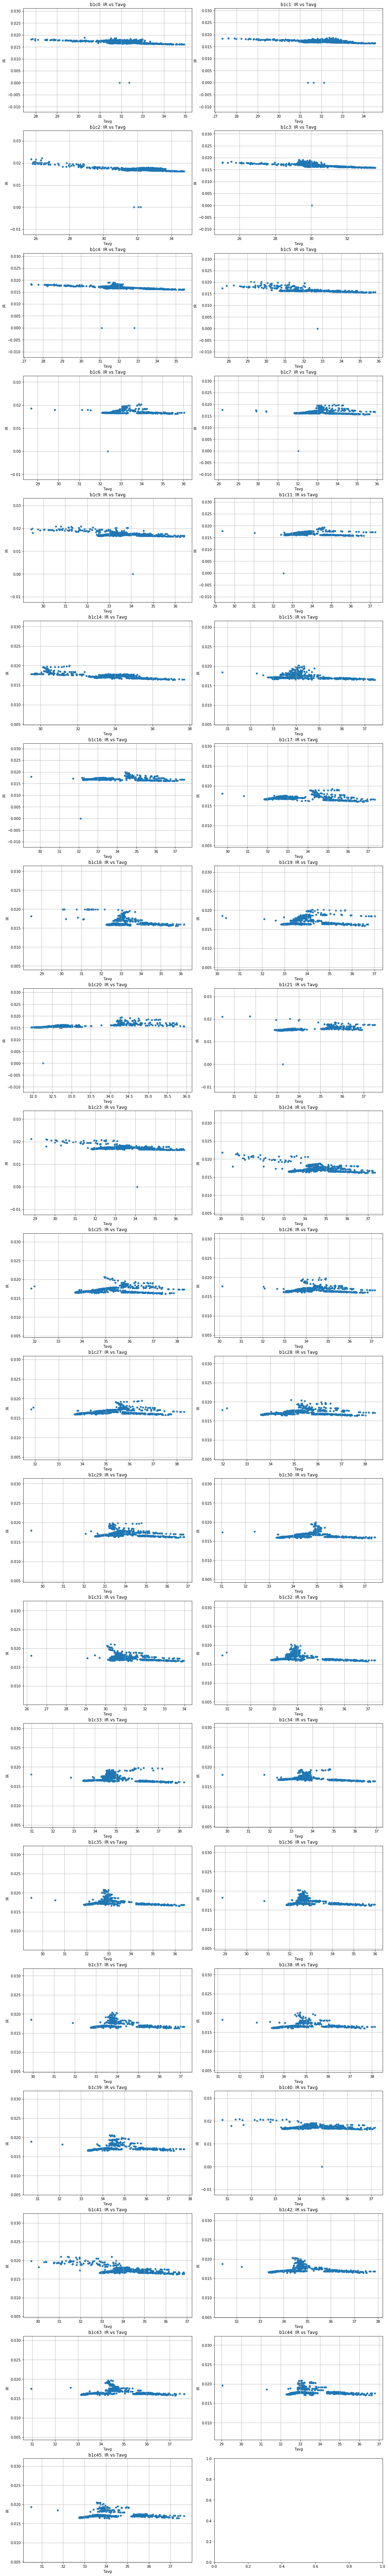

In [10]:
# Demonstrate the function that plots original features from per cycle data
# from any batch. I want to see how each feature impacts on others visually,
# so that I can use this information to create more features. I am just 
# curious to know how fast a feature grows or decays with respect to
# another feature.

# IR vs Tavg
utils_gn.plot_variables_for_patterns(batch_data=batch1_data,
                                     independent_variable='Tavg',
                                     dependent_variable='IR')

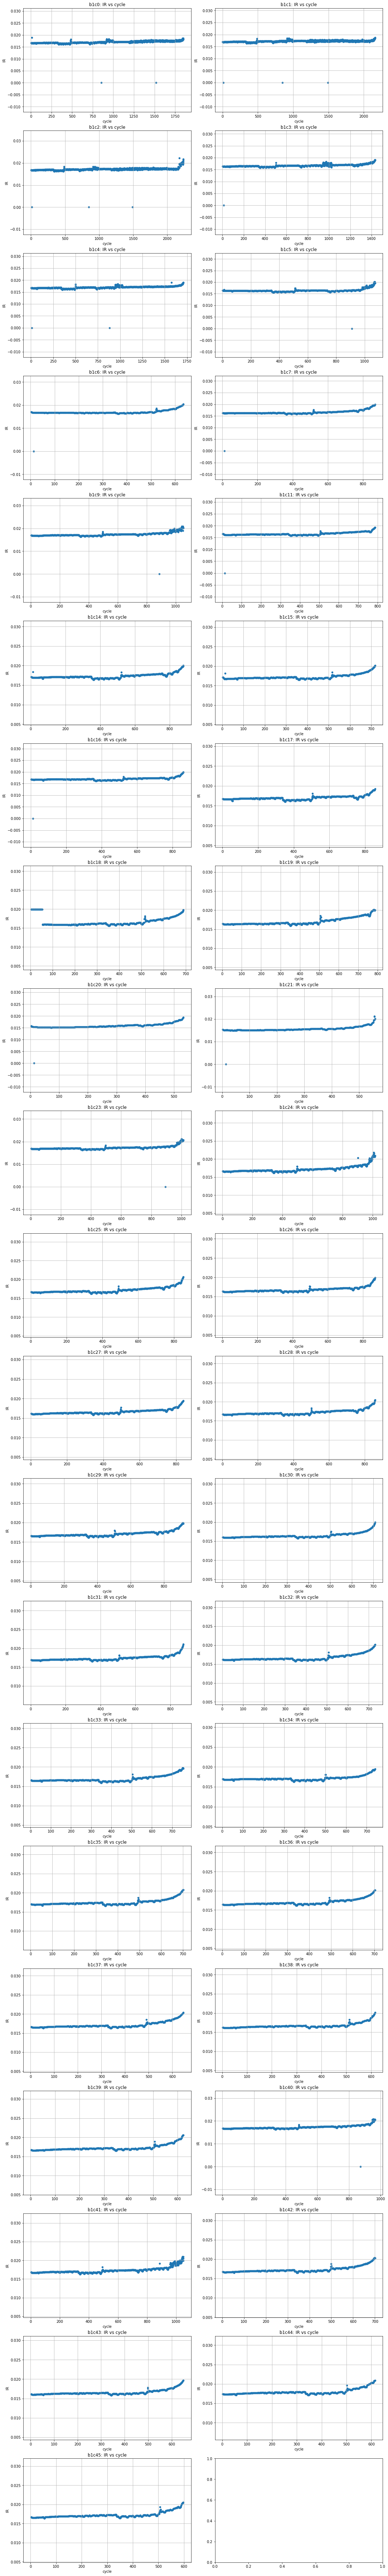

In [11]:
# IR vs cycle
utils_gn.plot_variables_for_patterns(batch_data=batch1_data,
                                     independent_variable='cycle',
                                     dependent_variable='IR')

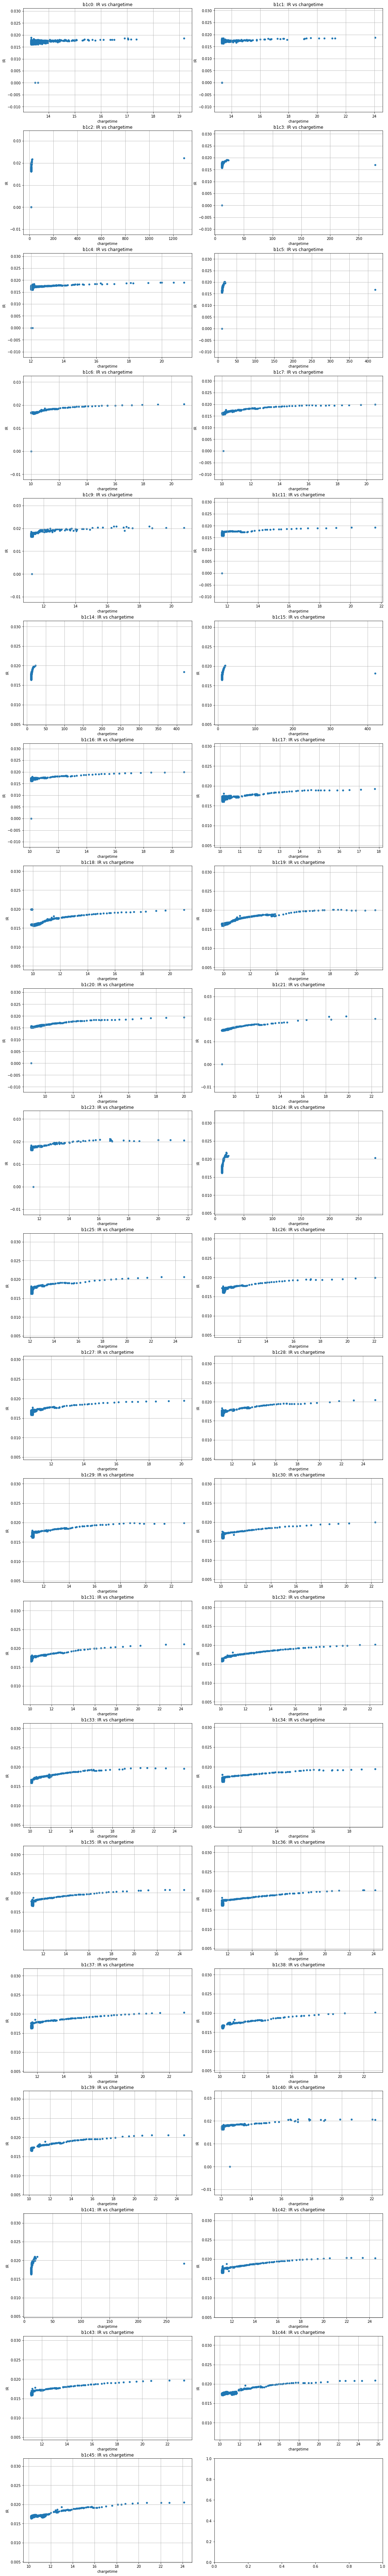

In [12]:
# IR vs chargetime
utils_gn.plot_variables_for_patterns(batch_data=batch1_data,
                                     independent_variable='chargetime',
                                     dependent_variable='IR')

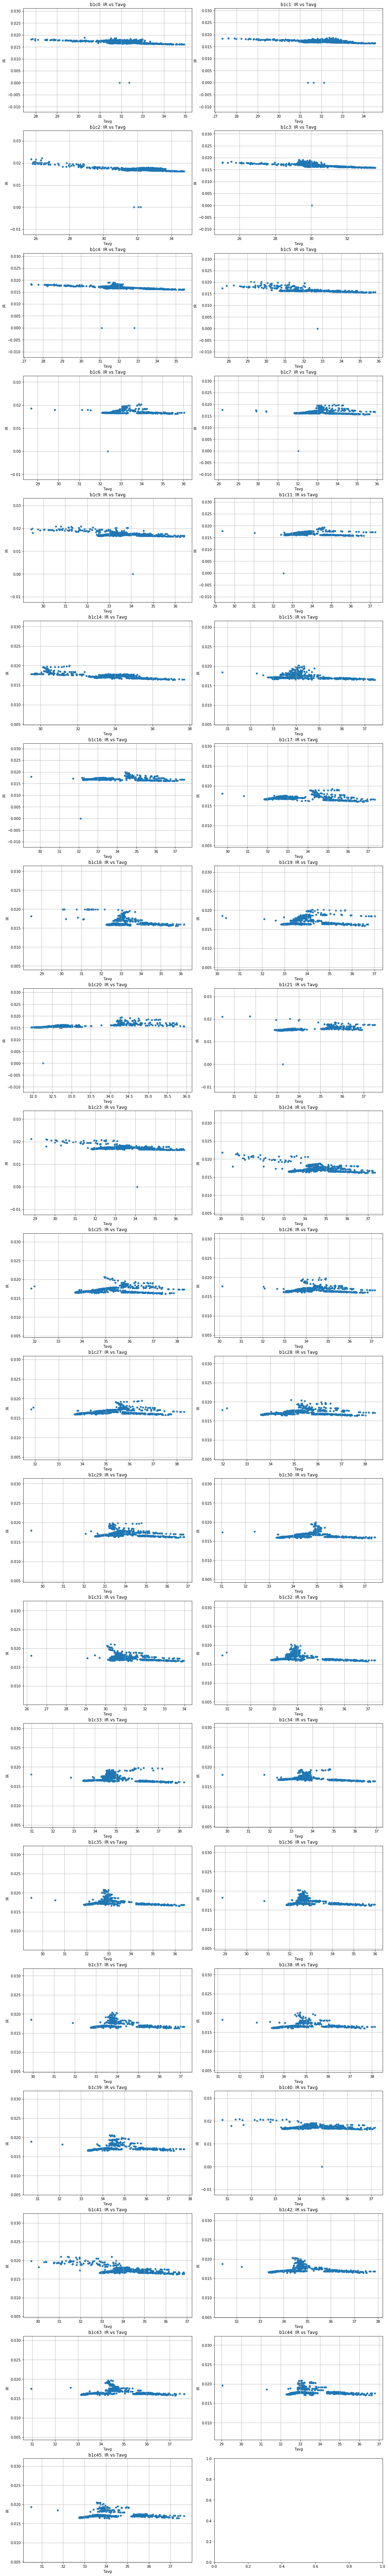

In [13]:
# IR vs QCharge
utils_gn.plot_variables_for_patterns(batch_data=batch1_data,
                                     independent_variable='Tavg',
                                     dependent_variable='IR')

In [55]:
# Demonstrate the function that creates features from parameters 
# which shows how an original feature changes with others. I first of all
# focus on per cycle data from a batch using IR as independent variable 
importlib.reload(utils_models)
importlib.reload(utils_gn)
rate_IR_df = utils_gn.gen_percycle_rate_features(batch_data=batch1_data,
                                    model_func_types=[utils_models.linear_model,
                                                       utils_models.exponential_growth, utils_models.linear_model, 
                                                       utils_models.exponential_growth, utils_models.linear_model],
                                   dependent_variable='IR',
                                   independent_variables=['Tavg', 'cycle', 'chargetime', 'QCharge'],
                                   initial_guesses=[[0.1, 0.1], [0.1, 0.01, 0.1], [0.1, 0.1], [1., 0.01, 0.1], [0.01, 0.01]])

rate_IR_df

/home/s2228293/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


,rate_IR_Tavg,rate_IR_cycle,rate_IR_chargetime,rate_IR_QCharge
b1c0,-0.000244,0.000499,0.000484,0.000384
b1c1,-0.000155,0.030761,0.000206,-0.000171
b1c2,-0.000320,0.018647,0.000004,0.000187
b1c3,-0.000297,0.001876,0.000006,-0.001606
b1c4,-0.000274,0.001047,0.000376,-0.000378
b1c5,-0.000270,0.017136,0.000004,0.000626
b1c6,0.000030,0.015596,0.000630,0.000691
b1c7,0.000104,0.009322,0.000578,0.000433
b1c9,-0.000366,0.007796,0.000643,0.000431
b1c11,0.000032,0.006454,0.000463,-0.001742
